In [ ]:
#Code snippet 0
#installing pycaret
!pip install -U --pre pycaret


In [ ]:
#code snippet 1
#import dataset
import pandas as pd
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQzBYWDif8AqH47QpdaMsxZ0d3aXafgvL6EfnsUk6iN5QPCgrhvEky7hzI16iyfL3L2rfec3QX32JQj/pub?gid=0&single=true&output=csv')
df

,DonorUniqueId,DonorPostalCode,DonorAge,MaritalStatus,GenderIdentity,IsMemberFlag,IsAlumnusFlag,IsParentFlag,HasInvolvementFlag,WealthRating,...,ConsecutiveDonorYears,LastFiscalYearDonation,Donation2FiscalYearsAgo,Donation3FiscalYearsAgo,Donation4FiscalYearsAgo,Donation5FiscalYearsAgo,CurrentFiscalYearDonation,CumulativeDonationAmount,DonorDateOfBirth,DonorIndicatorFlag.
0,1,23187.0,42,Married,Female,N,N,N,N,NaN,...,1,$0,$0,$0,$0,$0,$0,10.0,NaN,Y
1,2,77643.0,33,NaN,Female,N,Y,N,Y,NaN,...,0,$0,$0,$0,$0,$0,$0,2100.0,6/16/1985,Y
2,3,NaN,42,Married,Female,N,N,N,N,NaN,...,1,$0,$0,$0,$0,$0,$200,200.0,NaN,Y
3,4,47141.0,31,NaN,Female,N,Y,N,Y,NaN,...,0,$0,$0,$0,$0,$0,$0,0.0,12/3/1987,N
4,5,92555.0,68,NaN,Female,N,N,N,N,NaN,...,0,$0,$0,$0,$0,$0,$0,505.0,9/11/1950,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34503,34504,7848.0,42,NaN,Female,N,N,N,N,NaN,...,0,$0,$0,$0,$0,$0,$0,0.0,NaN,N
34504,34505,28275.0,24,NaN,Male,N,N,N,N,"$250,000-$499,999",...,0,$0,$0,$0,$0,$0,$0,80.0,9/23/1994,Y
34505,34506,42539.0,27,NaN,Female,N,Y,N,Y,NaN,...,0,$0,$0,$0,$0,$0,$0,0.0,1/3/1991,N
34506,34507,32733.0,46,Married,Female,N,N,N,Y,NaN,...,1,$0,$0,$0,$120,$0,$0,120.0,5/11/1972,Y


In [ ]:
#code snippet 2
# Libraries to help with reading and manipulating data
import numpy as np
import random
import requests
from io import StringIO


In [ ]:
#Code snippet 3
# Setting Zip as integer to remove decimal then converting it to string with 5 places
df = df[df['DonorPostalCode'].notna()]
df['DonorPostalCode'] = df['DonorPostalCode'].astype('int').astype(str).str.zfill(5)

<ipython-input-4-bb2f0834f6bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DonorPostalCode'] = df['DonorPostalCode'].astype('int').astype(str).str.zfill(5)


In [ ]:
#code snippet 4
#installing zipcodes to map postal codes to regions
!pip install zipcodes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 726.7/726.7 kB 9.2 MB/s eta 0:00:00


In [ ]:
#code snippet 5
#importing zipcodes to map postal codes to states and cities
import zipcodes

# Iterate through the zip column in df2
for index, row in df.iterrows():
    zipcode = row["DonorPostalCode"]

    # Get zipcode details
    zipcode_data = zipcodes.matching(zipcode)

    # Extract state and city if found
    if zipcode_data:
        state = zipcode_data[0]['state']
        city = zipcode_data[0]['city']
    else:
        state = "None"
        city = "None"

    df.loc[index, "STATE"] = state
    df.loc[index, "CITY"] = city # Adding city information as well


<ipython-input-6-a914f1627b18>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[index, "STATE"] = state
<ipython-input-6-a914f1627b18>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[index, "CITY"] = city # Adding city information as well


In [ ]:
#code snippet 6
#showing results
df[['DonorPostalCode','CITY', 'STATE']]

,DonorPostalCode,CITY,STATE
0,23187,Williamsburg,VA
1,77643,Port Arthur,TX
3,47141,Marysville,IN
4,92555,Moreno Valley,CA
5,95191,San Jose,CA
...,...,...,...
34503,07848,Lafayette,NJ
34504,28275,Charlotte,NC
34505,42539,Liberty,KY
34506,32733,Goldenrod,FL


In [ ]:
#code snippet 7
#prompt: for columns 'LastFiscalYearDonation', 'Donation2FiscalYearsAgo','Donation3FiscalYearsAgo','Donation4FiscalYearsAgo','Donation5FiscalYearsAgo','CurrentFiscalYearDonation', drop the decimal point, and the $ in front

columns_to_clean = ['LastFiscalYearDonation', 'Donation2FiscalYearsAgo',
                   'Donation3FiscalYearsAgo', 'Donation4FiscalYearsAgo',
                   'Donation5FiscalYearsAgo', 'CurrentFiscalYearDonation']

for column in columns_to_clean:
  df[column] = df[column].str.replace('$', '', regex=False)
  df[column] = df[column].str.replace('.00', '', regex=False)
  df[column] = pd.to_numeric(df[column], errors='coerce')
  df[column] = df[column].fillna(0).astype(int)
df

<ipython-input-8-07c9d771b8f1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.replace('$', '', regex=False)
<ipython-input-8-07c9d771b8f1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.replace('.00', '', regex=False)
<ipython-input-8-07c9d771b8f1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,DonorUniqueId,DonorPostalCode,DonorAge,MaritalStatus,GenderIdentity,IsMemberFlag,IsAlumnusFlag,IsParentFlag,HasInvolvementFlag,WealthRating,...,Donation2FiscalYearsAgo,Donation3FiscalYearsAgo,Donation4FiscalYearsAgo,Donation5FiscalYearsAgo,CurrentFiscalYearDonation,CumulativeDonationAmount,DonorDateOfBirth,DonorIndicatorFlag.,STATE,CITY
0,1,23187,42,Married,Female,N,N,N,N,NaN,...,0,0,0,0,0,10.0,NaN,Y,VA,Williamsburg
1,2,77643,33,NaN,Female,N,Y,N,Y,NaN,...,0,0,0,0,0,2100.0,6/16/1985,Y,TX,Port Arthur
3,4,47141,31,NaN,Female,N,Y,N,Y,NaN,...,0,0,0,0,0,0.0,12/3/1987,N,IN,Marysville
4,5,92555,68,NaN,Female,N,N,N,N,NaN,...,0,0,0,0,0,505.0,9/11/1950,Y,CA,Moreno Valley
5,6,95191,57,NaN,Male,N,N,N,N,NaN,...,0,0,0,0,0,0.0,1/23/1961,N,CA,San Jose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34503,34504,07848,42,NaN,Female,N,N,N,N,NaN,...,0,0,0,0,0,0.0,NaN,N,NJ,Lafayette
34504,34505,28275,24,NaN,Male,N,N,N,N,"$250,000-$499,999",...,0,0,0,0,0,80.0,9/23/1994,Y,NC,Charlotte
34505,34506,42539,27,NaN,Female,N,Y,N,Y,NaN,...,0,0,0,0,0,0.0,1/3/1991,N,KY,Liberty
34506,34507,32733,46,Married,Female,N,N,N,Y,NaN,...,0,0,120,0,0,120.0,5/11/1972,Y,FL,Goldenrod


In [ ]:
# Code snippet 8
#prompt: for column CumulativeDonationAmount, drop the decimal point

df['CumulativeDonationAmount'] = df['CumulativeDonationAmount'].astype(str).str.replace('.', '')


<ipython-input-9-2037cc13b493>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CumulativeDonationAmount'] = df['CumulativeDonationAmount'].astype(str).str.replace('.', '')


In [ ]:
#code snippet 9
# prompt: for column 'WealthRating', map 1 for '$1-$24,999', 2 for '$25,000-$49,999', 3 for $50,000-$99,999, 4 for $100,000-$249,999, 5 for $250,000-$499,999, 6 for $500,000-$999,999, 7 for $1,000,000-$2,499,999, 8 for $2,500,000-$4,999,999

# Create a mapping dictionary for WealthRating
wealth_rating_mapping = {
    '$1-$24,999': 1,
    '$25,000-$49,999': 2,
    '$50,000-$99,999': 3,
    '$100,000-$249,999': 4,
    '$250,000-$499,999': 5,
    '$500,000-$999,999': 6,
    '$1,000,000-$2,499,999': 7,
    '$2,500,000-$4,999,999': 8
}

# Map the WealthRating column using the mapping dictionary
df['WealthRating'] = df['WealthRating'].map(wealth_rating_mapping)

df['WealthRating'].unique()

<ipython-input-10-823208e3e7d4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WealthRating'] = df['WealthRating'].map(wealth_rating_mapping)


array([nan,  3.,  4.,  2.,  5.,  1.,  7.,  6.,  8.])

In [ ]:
#code snippet 10
#setting the target variable
target = 'DonorIndicatorFlag.'

In [ ]:
#code snippet 11
#setting the noise/redundant variables
ignored_columns= ['DonorUniqueId','DonorDateOfBirth','CumulativeDonationAmount' ,'IsMemberFlag' ,'LastFiscalYearDonation', 'Donation2FiscalYearsAgo',
       'Donation3FiscalYearsAgo', 'Donation4FiscalYearsAgo',
       'Donation5FiscalYearsAgo', 'CurrentFiscalYearDonation' , 'WealthRating' , 'MaritalStatus' , 'AcademicDegreeLevel'  ]

In [ ]:
#code snippet 12
#setting the numerical variables
numeric_columns = ['DonorAge','ConsecutiveDonorYears' ]

In [ ]:
#code snippet 13
#setting the categorical variables
categorical_columns = ['GenderIdentity',  'IsAlumnusFlag', 'IsParentFlag',
       'HasInvolvementFlag' , 'PreferredAddressType', 'HasEmailFlag','CITY', 'STATE', 'DonorPostalCode']

In [ ]:
#code snippet 14
#importing classification libraries
from pycaret.classification import *

In [ ]:
#code snippet 15
#setting /configuring pycaret model
classificaiton_setup = setup(data = df, target = target,
                              ignore_features = ignored_columns,
                              numeric_features = numeric_columns,
                             categorical_features = categorical_columns)

,Description,Value
0,Session id,6672
1,Target,DonorIndicatorFlag.
2,Target type,Binary
3,Target mapping,"N: 0, Y: 1"
4,Original data shape,"(34417, 25)"
5,Transformed data shape,"(34417, 19)"
6,Transformed train set shape,"(24091, 19)"
7,Transformed test set shape,"(10326, 19)"
8,Ignore features,13
9,Numeric features,2


In [ ]:
#code snippet 16
#invoking ML alo
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.6210,0.5000,0.6210,0.3857,0.4758,0.0000,0.0000,0.4350
nb,Naive Bayes,0.5962,0.5423,0.5962,0.5385,0.5273,0.0128,0.0157,0.5200
ridge,Ridge Classifier,0.5954,0.5270,0.5954,0.5337,0.5223,0.0050,0.0068,0.4540
lda,Linear Discriminant Analysis,0.5952,0.5258,0.5952,0.5338,0.5227,0.0052,0.0071,0.5930
ada,Ada Boost Classifier,0.5949,0.5344,0.5949,0.5367,0.5264,0.0092,0.0121,1.0820
gbc,Gradient Boosting Classifier,0.5948,0.5335,0.5948,0.5364,0.5261,0.0089,0.0116,1.9920
lr,Logistic Regression,0.5933,0.5318,0.5933,0.5389,0.5308,0.0130,0.0163,2.8640
lightgbm,Light Gradient Boosting Machine,0.5893,0.5248,0.5893,0.5394,0.5355,0.0154,0.0181,1.4320
rf,Random Forest Classifier,0.5737,0.5189,0.5737,0.5395,0.5443,0.0192,0.0204,1.9550
xgboost,Extreme Gradient Boosting,0.5723,0.5186,0.5723,0.5392,0.5412,0.0177,0.0193,0.7860


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

DummyClassifier(constant=None, random_state=6672, strategy='prior')

In [ ]:
#code snippet 17
#creating the model with best algo(accurac plus best precision)
best_model = create_model('knn')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5552,0.5139,0.5552,0.5347,0.5410,0.0109,0.0111
1,0.5500,0.5156,0.5500,0.5323,0.5384,0.0063,0.0064
2,0.5824,0.5607,0.5824,0.5716,0.5755,0.0887,0.0893
3,0.5558,0.5167,0.5558,0.5402,0.5456,0.0226,0.0229
4,0.5467,0.5168,0.5467,0.5369,0.5409,0.0160,0.0161
5,0.5650,0.5482,0.5650,0.5529,0.5573,0.0494,0.0498
6,0.5542,0.5084,0.5542,0.5400,0.5452,0.0224,0.0226
7,0.5355,0.4934,0.5355,0.5187,0.5249,-0.0219,-0.0222
8,0.5554,0.5255,0.5554,0.5454,0.5494,0.0339,0.0340


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

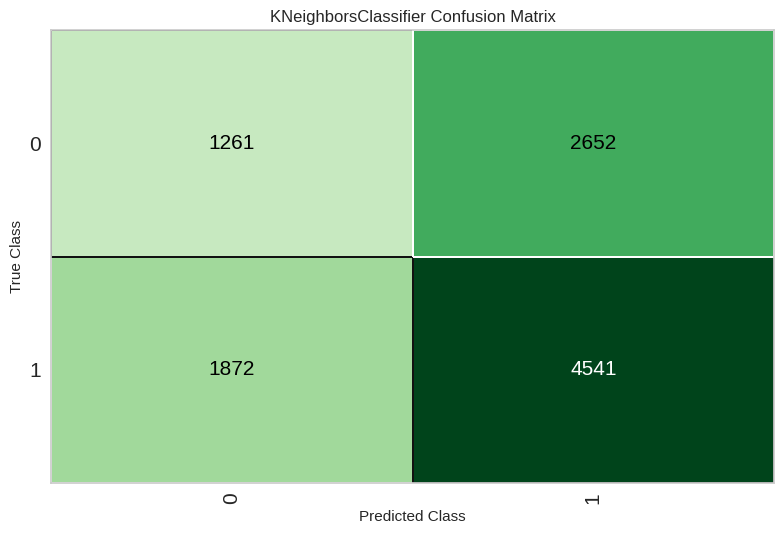

In [ ]:
#code snippet 18
#displaying confusion matrix
plot_model(best_model, plot = 'confusion_matrix')

In [ ]:
#code snippet 19
# predicting the donor flag status
donor_predictions= predict_model(best_model,df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7795,0.8470,0.7795,0.7767,0.7769,0.5221,0.5239


In [ ]:
#code snippet 20
#exporting prediction result to csv
donor_predictions.to_csv("redcross donation predictions(knn).csv")